<a href="https://colab.research.google.com/github/jeha100/google_drive/blob/main/chapter_4_1_%ED%95%98%EC%A7%80%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
- 로지스틱 회귀는 분류 모델이다. 선형 회귀와 동일하게 선형 방정식을 학습한다. 선형 회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력 한다.
- 다중 분류는 타깃 클래스가 2개 이상인 분류 문제이다.
- 시그모이드 함수는 선형 방정식의 출력을 0과 1 사이의 값으로 압축하며 이진 분류를 위해 사용한다.


#scikit-learn 
  - LogisticRegression 선형 분류 알고리즘인 로지스틱 회귀 위한 클래스이다.
  - predict_proba() 메서드는 예측 확률을 반환
  -decision_function()은 모델이 학습한 선형 방정식의 출력을 반화난다.

# 데이터 불러오기
- 컬럼 설명 177p 그림 

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 변환
- 배열로 변환
- 독립변수

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input.shape

(159, 5)

- target
- 종속변수

In [ ]:
fish_target = fish['Species'].to_numpy()

# 훈련데이터와 테스트데이터

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target =train_test_split(
fish_input,fish_target,random_state=42)

- 표준화 전처리 

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()#클래스호출
ss.fit(train_input)

train_scaled = ss.transform(train_input)

test_scaled = ss.transform(test_input)


In [ ]:
print(train_input[:5])
print(train_scaled [:5])



[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


# k- 최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 182p

- 다중분류

In [ ]:
#위 확률 예측
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))
print(kn.classes_)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


# 로지스틱 회귀
- 중요도 : 최상
- 오늘 유투브 영상 반드시 시청 
 + 개념 재복습 반드시 필요
- Why?
  + 로지스틱 회귀
    + 기초 통계로도 활용 (의학통계)
    + 머신러닝 분류모형의 기초 모형인데, 성능이 생각보다 나쁘지 않음
      - 데이터셋, 수치 데이터 기반
    + 딥러닝 : 초기모형에 해당됨. 


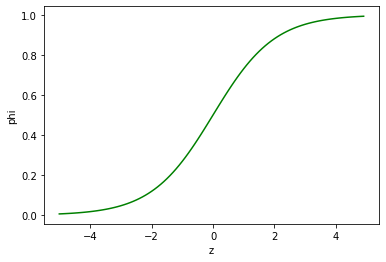

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
#print(z)
#print(phi)

plt.plot(z,phi,color='green') # 문서를 봐야함 
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 개발자 취업을 원함
  + 공부 별도로 하지 않는다!
- 다만, 알고리즘 컨셉만 이해한다. 

# 로지스틱 회귀로 이진 분류 수행

In [ ]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]]) # true값만 추출 판다스

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- 186
- 모형만들고 예측하기!

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#      독립변수            종속변수  x,y 같이들어감 
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [ ]:
# 예측
#클래스로 분류
#확률값 기준 0.5
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


- 방정식의 각 기울기와 상수를 구하는 코드

In [ ]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z식
- z값을 출력

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit 
print(expit(decisions) )# proba 와 비슷하나

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
